<a href="https://colab.research.google.com/github/dhalfks/test/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_0423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##분류실습 KNN


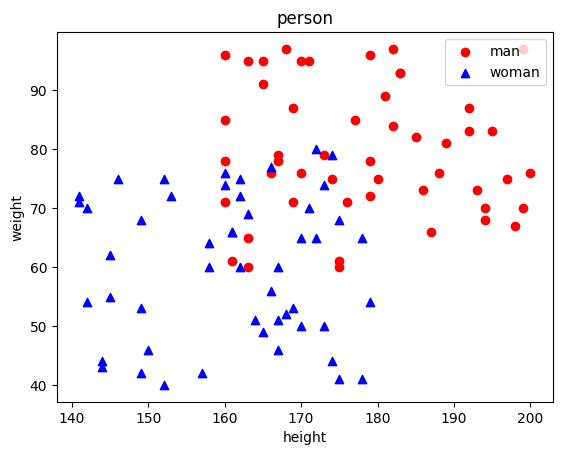

In [52]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

man_height = [random.randint(160,200) for _ in range(50)]
man_weight = [random.randint(60,100) for _ in range(50)]
woman_height = [random.randint(140,180) for _ in range(50)]
woman_weight = [random.randint(40,80) for _ in range(50)]

plt.scatter(man_height, man_weight, c='r', label='man')
plt.scatter(woman_height, woman_weight,c='b',marker='^', label='woman')

plt.xlabel('height')             
plt.ylabel('weight')             
plt.title("person")
plt.legend(loc='upper right')
plt.show()

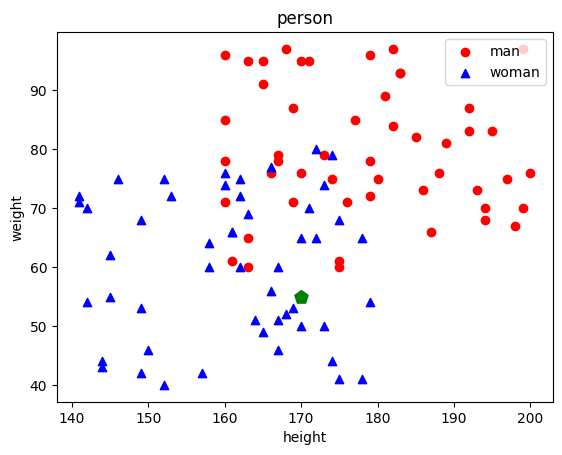

In [53]:
plt.scatter(man_height, man_weight, c='r', label='man')
plt.scatter(woman_height, woman_weight,c='b',marker='^', label='woman')

plt.xlabel('height')             
plt.ylabel('weight')             
plt.title("person")
plt.legend(loc='upper right')

newdata_height = [170]    # 새로운 데이터의 몸무게
newdata_weight = [55]    # 새로운 데이터의 키

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_height, newdata_weight, s=100, marker='p',\
            c='g', label='new Data')
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsClassifier

man_height = [random.randint(160,200) for _ in range(50)]
man_weight = [random.randint(60,100) for _ in range(50)]
woman_height = [random.randint(140,180) for _ in range(50)]
woman_weight = [random.randint(40,80) for _ in range(50)]

In [55]:
m_data = np.column_stack((man_height, man_weight))
print(m_data)

[[175  71]
 [191  83]
 [161  61]
 [194  68]
 [171 100]
 [169  66]
 [189  78]
 [186  70]
 [165  71]
 [192  92]
 [185  97]
 [185  81]
 [175  95]
 [197  96]
 [176  63]
 [192  63]
 [194  68]
 [191  65]
 [179  79]
 [189  78]
 [198  98]
 [199  93]
 [189  93]
 [168  80]
 [196  91]
 [181  95]
 [200  82]
 [197  67]
 [165  64]
 [175  66]
 [175  94]
 [191  87]
 [177  97]
 [180  75]
 [190  60]
 [178  97]
 [164  94]
 [179  94]
 [200  71]
 [163  80]
 [182  99]
 [185  96]
 [171  65]
 [177  73]
 [185  75]
 [186  76]
 [183  77]
 [197  77]
 [178  81]
 [188  91]]


In [56]:
print([1,2,3] + [4,5,6])

[1, 2, 3, 4, 5, 6]


In [57]:
import numpy as np

A1=np.array([1,2,3])
B1=np.array([4,5,6])
print(np.column_stack((A1,B1)))

[[1 4]
 [2 5]
 [3 6]]


In [58]:
m_label = np.zeros(len(m_data))   # 남자는 0으로 레이블링
print(m_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [59]:
w_data = np.column_stack((woman_height, woman_weight))
w_label = np.ones(len(w_data))   # 여자는 1로 레이블링

In [60]:
person = np.concatenate((m_data, w_data))
print(person)
lables = np.concatenate((m_label, w_label))
print(lables)

[[175  71]
 [191  83]
 [161  61]
 [194  68]
 [171 100]
 [169  66]
 [189  78]
 [186  70]
 [165  71]
 [192  92]
 [185  97]
 [185  81]
 [175  95]
 [197  96]
 [176  63]
 [192  63]
 [194  68]
 [191  65]
 [179  79]
 [189  78]
 [198  98]
 [199  93]
 [189  93]
 [168  80]
 [196  91]
 [181  95]
 [200  82]
 [197  67]
 [165  64]
 [175  66]
 [175  94]
 [191  87]
 [177  97]
 [180  75]
 [190  60]
 [178  97]
 [164  94]
 [179  94]
 [200  71]
 [163  80]
 [182  99]
 [185  96]
 [171  65]
 [177  73]
 [185  75]
 [186  76]
 [183  77]
 [197  77]
 [178  81]
 [188  91]
 [166  42]
 [160  50]
 [176  43]
 [153  60]
 [142  77]
 [176  43]
 [153  76]
 [177  42]
 [152  58]
 [176  42]
 [159  51]
 [143  53]
 [169  79]
 [153  57]
 [145  76]
 [150  44]
 [143  73]
 [172  63]
 [150  64]
 [170  76]
 [153  67]
 [169  67]
 [144  41]
 [160  60]
 [168  75]
 [175  64]
 [152  50]
 [178  52]
 [180  69]
 [165  69]
 [151  54]
 [169  76]
 [157  65]
 [157  64]
 [151  48]
 [146  61]
 [175  70]
 [144  42]
 [157  55]
 [141  62]
 [180  59]

In [61]:
import numpy as np

A1=np.array([1,2,3])
B1=np.array([4,5,6])
print(np.column_stack((A1,B1)))
print(np.concatenate((A1,B1)))

[[1 4]
 [2 5]
 [3 6]]
[1 2 3 4 5 6]


In [62]:
newdata = [[150,55]]
person_classes = {0:'남자', 1:'여자'} 

k = 3     # k를 3
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(person, lables)

y_pred = knn.predict(newdata)
print('데이터', newdata[0], ' 판정 결과 --->', person_classes[y_pred[0]])

데이터 [150, 55]  판정 결과 ---> 여자


In [63]:
# kNN에서 이웃한 데이터를 얻는 코드

distances, indexes = knn.kneighbors(newdata)

print('dist =', distances) 
print('indexes =', indexes) 
print('person[indexes] =\n', person[indexes])

dist = [[1.41421356 2.23606798 3.60555128]]
indexes = [[80 98 63]]
person[indexes] =
 [[[151  54]
  [148  54]
  [153  57]]]


data = (100, 2)
index = (1, 3)
k = 3

데이터 [[150, 55]]  판정 결과 --> 여자


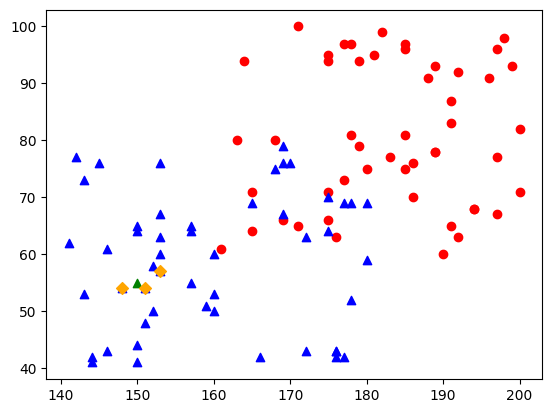

In [64]:
def draw_neightbor(data, index, k):
    print('data =', data.shape)
    print('index =', index.shape)
    print('k =', k)
    for i in range(k):
        plt.scatter(data[index][0][i][0], person[index][0][i][1], marker='D', color='orange')

plt.scatter(newdata[0][0], newdata[0][1], color = 'green', marker='^')

plt.scatter(man_height, man_weight, c='r', label='man')
plt.scatter(woman_height, woman_weight,c='b',marker='^', label='woman')

draw_neightbor(person, indexes, k)
print('\n데이터', newdata, ' 판정 결과 -->', person_classes[y_pred[0]])

data = (100, 2)
index = (1, 3)
k = 3


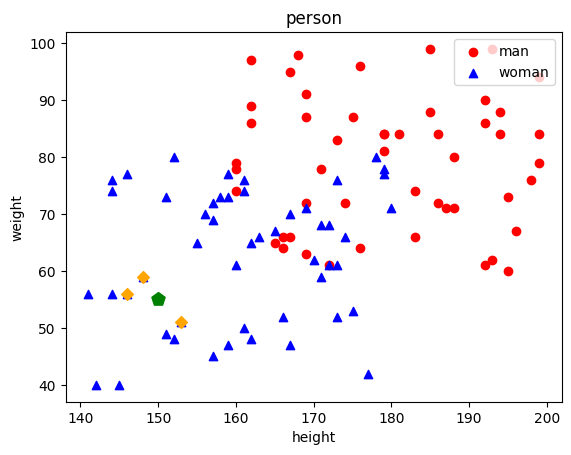

데이터 [150, 55]  판정 결과 ---> 여자


In [65]:
# KNN 코드 정리 

import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def draw_neightbor(data, index, k):
    print('data =', data.shape)
    print('index =', index.shape)
    print('k =', k)
    for i in range(k):
        plt.scatter(data[index][0][i][0], person[index][0][i][1], marker='D', color='orange')


man_height = [random.randint(160,200) for _ in range(50)]
man_weight = [random.randint(60,100) for _ in range(50)]
woman_height = [random.randint(140,180) for _ in range(50)]
woman_weight = [random.randint(40,80) for _ in range(50)]

m_data = np.column_stack((man_height, man_weight))
m_label = np.zeros(len(m_data))   # 남자는 0으로 레이블링
w_data = np.column_stack((woman_height, woman_weight))
w_label = np.ones(len(w_data))   # 여자는 1로 레이블링
person = np.concatenate((m_data, w_data))
labels = np.concatenate((m_label, w_label))

newdata = [[150,55]]
person_classes = {0:'남자', 1:'여자'} 

k = 3     # k를 3
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(person, labels)

y_pred = knn.predict(newdata)


distances, indexes = knn.kneighbors(newdata)

plt.scatter(man_height, man_weight, c='r', label='man')
plt.scatter(woman_height, woman_weight,c='b',marker='^', label='woman')

plt.xlabel('height')             
plt.ylabel('weight')             
plt.title("person")
plt.legend(loc='upper right')


plt.scatter(newdata[0][0], newdata[0][1], s=100, marker='p', c='green', label='new Data')

draw_neightbor(person, indexes, k)
plt.show()
print('데이터', newdata[0], ' 판정 결과 --->', person_classes[y_pred[0]])

##로지스틱 회귀

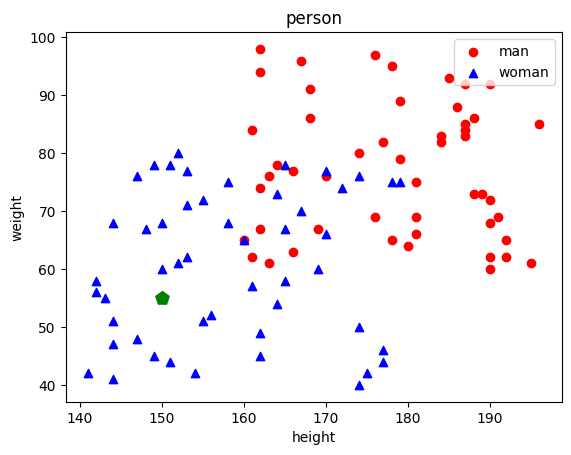

데이터 [150, 55]  판정 결과 ---> 여자


In [66]:
# 로지스틱 남여 
import random
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

man_height = [random.randint(160,200) for _ in range(50)]
man_weight = [random.randint(60,100) for _ in range(50)]
woman_height = [random.randint(140,180) for _ in range(50)]
woman_weight = [random.randint(40,80) for _ in range(50)]

m_data = np.column_stack((man_height, man_weight))
m_label = np.zeros(len(m_data))   # 남자는 0으로 레이블링
w_data = np.column_stack((woman_height, woman_weight))
w_label = np.ones(len(w_data))   # 여자는 1로 레이블링
person = np.concatenate((m_data, w_data))
labels = np.concatenate((m_label, w_label))

newdata = [[150,55]]
person_classes = {0:'남자', 1:'여자'} 


model = LogisticRegression()
model.fit(person, labels)

y_pred = model.predict(newdata)

plt.scatter(man_height, man_weight, c='r', label='man')
plt.scatter(woman_height, woman_weight,c='b',marker='^', label='woman')

plt.xlabel('height')             
plt.ylabel('weight')             
plt.title("person")
plt.legend(loc='upper right')


plt.scatter(newdata[0][0], newdata[0][1], s=100, marker='p', c='green', label='new Data')

plt.show()
print('데이터', newdata[0], ' 판정 결과 --->', person_classes[y_pred[0]])

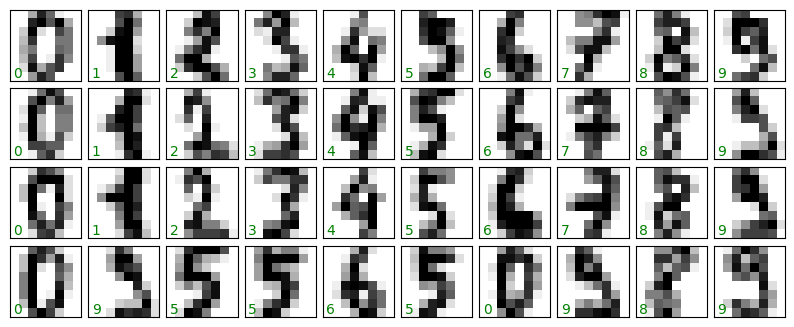

In [67]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# digits 데이터셋 불러오기
digits = load_digits()

# 데이터셋 시각화
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
    
plt.show()

In [68]:
from sklearn.datasets import load_iris 

iris = load_iris() 
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [69]:
print('iris 데이터 형태:', iris.data.shape)

iris 데이터 형태: (150, 4)


In [70]:
print('iris 데이터 속성들:', iris.feature_names)

iris 데이터 속성들: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [71]:
print('iris 데이터의 래이블', iris.target_names)

iris 데이터의 래이블 ['setosa' 'versicolor' 'virginica']


In [89]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [90]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [91]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [92]:
iris_df.values[:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

In [93]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [94]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [95]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [96]:
# 직접 분류한 데이터로 학습
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.978


In [80]:
# 사이킷런 데이터로 바로 학습
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 붓꽃 데이터 로드
iris = load_iris()

# 데이터와 타겟 변수 할당
X = iris.data
y = iris.target

# 훈련 데이터와 테스트 데이터로 분할 (테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=3)  # 이웃의 수를 3으로 설정
knn.fit(X_train, y_train)

# 모델 예측 및 평가
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


In [81]:
# 새로운 데이터에 대하여 모델을 적용하고 분류

from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
 
k = 3
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(iris.data, iris.target) 

classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 새로운 데이터를 제시해 보자. 
X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]] 
y = knn.predict(X) 
 
print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]])) 
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor


In [97]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.960


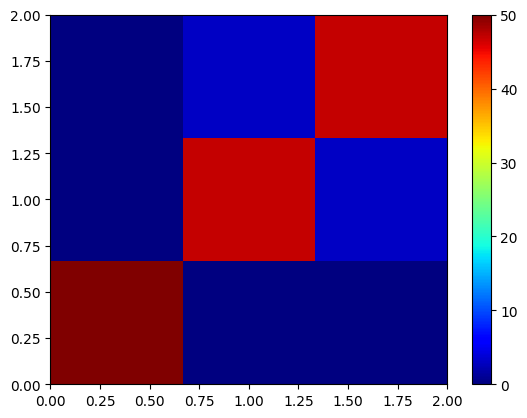

In [98]:
# 2d히스토그램 
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

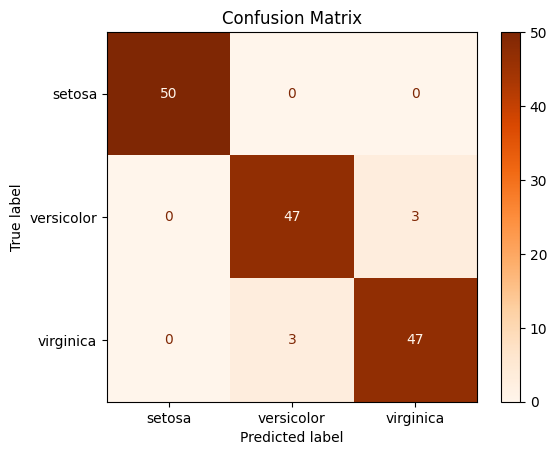

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label=['setosa', 'versicolor', 'virginica'] #라벨 설정
plot = ConfusionMatrixDisplay.from_predictions(iris.target,y_pred_all,
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Oranges, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [105]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

- confusion_matrix(y_true, y_pred)
- accuracy_score(y_true, y_pred)
- precision_score(y_true, y_pred)
- recall_score(y_true, y_pred)
- f1_score(y_true, y_pred)
- classfication_report(y_true, y_pred)
- roc_curve
- auc

In [106]:
from sklearn.metrics import confusion_matrix

# 종속 변수와 예측 결과로 컨퓨전매트릭스 생성
cm = confusion_matrix(iris.target, y_pred_all)
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [115]:
from sklearn.metrics import accuracy_score

# 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(iris.target, y_pred_all))

0.96


In [116]:
from sklearn.metrics import precision_score

# 종속 변수와 예측 결과로 정밀도 계산
print(precision_score(iris.target, y_pred_all,average='micro'))

0.96


In [117]:
from sklearn.metrics import recall_score

# 종속 변수와 예측 결과로 재현율 계산
print(recall_score(iris.target, y_pred_all,average='macro'))

0.96


In [118]:
from sklearn.metrics import f1_score

# 종속 변수와 예측 결과로 F값 계산
print(f1_score(iris.target, y_pred_all, average='weighted'))

0.96


In [119]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = pd.Series(cancer.target)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [120]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 로드
cancer = load_breast_cancer()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분류 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9790209790209791


In [122]:
from sklearn.metrics import roc_curve

# 유방암 진단 데이터세트 특징 데이터의 예측 확률 계산
probas = model.predict_proba(X_test)

# 종속 변수와 예측 확률의 두 번째 요소로 ROC 곡선을 생성하고 위양성률, 진양성률, 기준값 저장
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

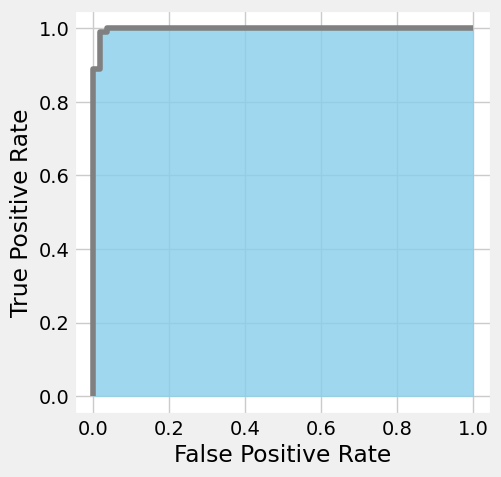

In [123]:
import matplotlib.pyplot as plt

# ROC 곡선의 그래프 영역 스타일 지정
plt.style.use('fivethirtyeight')

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 그래프 영역의 크기 설정
fig.set_size_inches(4.8, 5)

# 그래프의 선을 이루는 값과 선 색상 설정
ax.step(fpr, tpr, 'gray')

# 그래프의 선을 기준으로 곡선아래면적을 skyblue로 채우도록 설정
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)

# x축 레이블 설정
ax.set_xlabel('False Positive Rate')

# y축 레이블 설정
ax.set_ylabel('True Positive Rate')

# 그래프 영역 배경색 설정
ax.set_facecolor('xkcd:white')

# 최종 그래프 생성
plt.show()

##군집분석데이터

In [ ]:
# 군집분석데이터(게임): https://drive.google.com/file/d/1LbKw9EeOaIni9jruDEoYuWOO1q7mFsU_/view?usp=sharing

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

game_usage = pd.read_csv('game_usage.csv')
game_usage.head(5)

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


1. 게임을 오래하고 게임 레벨도 높은 고객
2. 게임을 오래하고도 게임 레벨이 낮은 고객
3. 게임을 짧게하지만 게임 레벨이 높은 고객
4. 게임을 짧게하고 게임 레벨도 낮은 고객

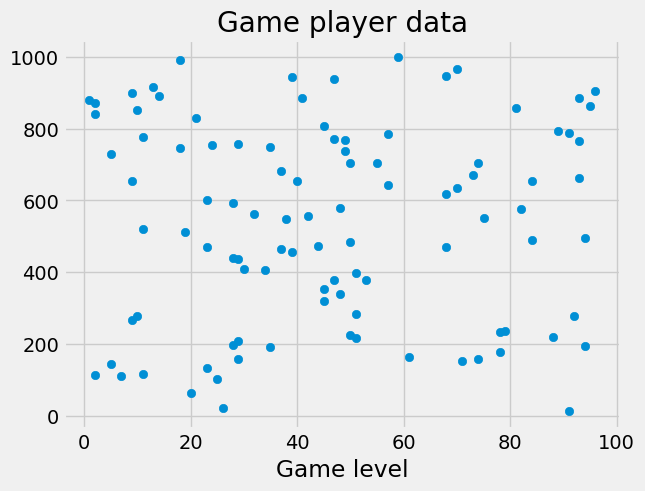

In [126]:
X = game_usage['time spent']
Y = game_usage['game level']

# 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level') 
plt.scatter(X, Y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


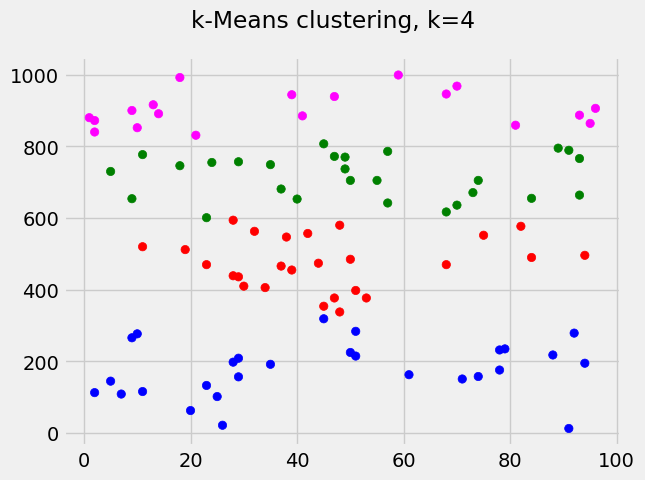

In [127]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(data)
    labels = model.predict(data)
    colors = np.array(['red', 'green', 'blue', 'magenta']) 
    plt.suptitle('k-Means clustering, k={}'.format(k)) 
    plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.0, 1000.0)

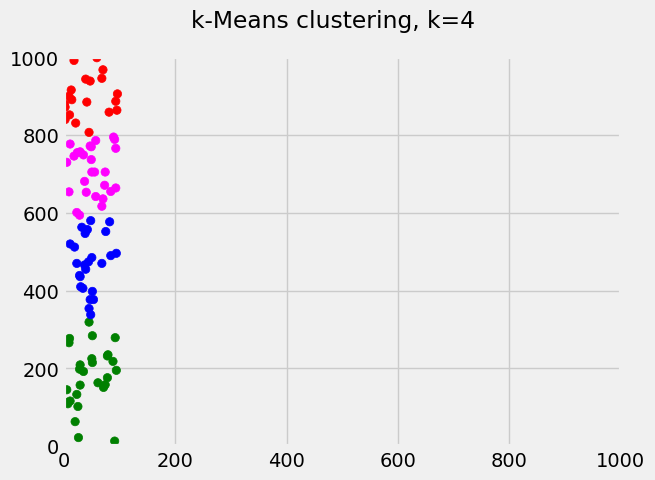

In [128]:
# x축이 훨씬 적다
kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000)
plt.ylim(0, 1000)

In [129]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


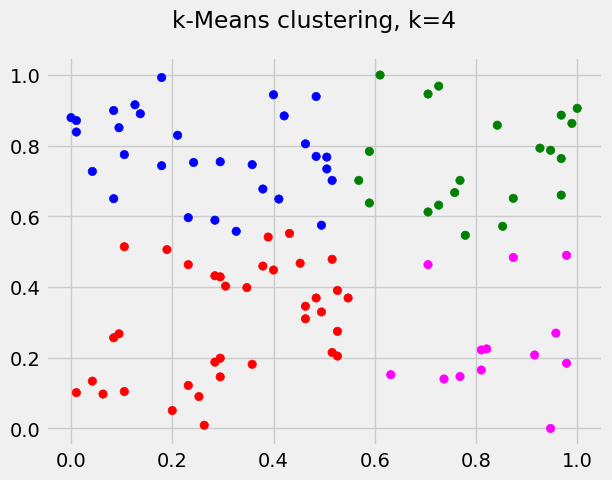

In [130]:
kmeans_predict_plot(n_data, k = 4) # 4개의 군집 생성

In [131]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
b = a.reshape(-1, 1) # 2차원으로 변경
scaler.fit(b)
print(b)
new = scaler.transform(b)
print(new)
print('합계 :', new.sum())
print('평균 :', new.mean())
print('분산 :', new.var())
print('표준편차 :', new.std())

[[10]
 [ 8]
 [10]
 [ 8]
 [ 8]
 [ 4]]
[[1.        ]
 [0.66666667]
 [1.        ]
 [0.66666667]
 [0.66666667]
 [0.        ]]
합계 : 3.9999999999999996
평균 : 0.6666666666666666
분산 : 0.11111111111111109
표준편차 : 0.3333333333333333


In [134]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
b = a.reshape(-1, 1) # 2차원으로 변경
ss.fit(b)
print(b)
new = ss.transform(b)
print(new)
print('합계 :', new.sum())
print('평균 :', new.mean())
print('분산 :', new.var())
print('표준편차 :', new.std())

[[10]
 [ 8]
 [10]
 [ 8]
 [ 8]
 [ 4]]
[[ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [-2.]]
합계 : 0.0
평균 : 0.0
분산 : 1.0
표준편차 : 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: >

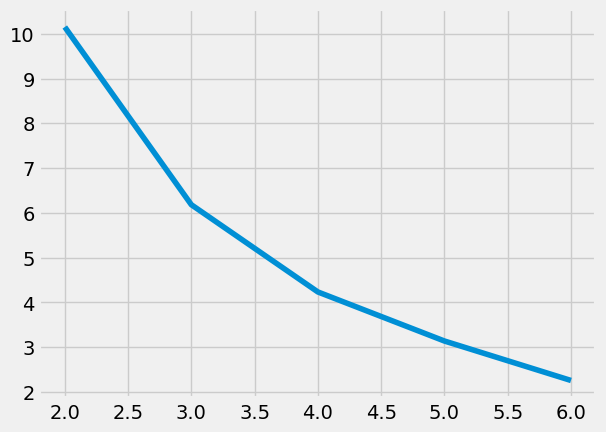

In [135]:
import seaborn as sns
distance = []
for k in range(2,7):
    k_model = cluster.KMeans(n_clusters=k)
    k_model.fit(n_data)
    distance.append(k_model.inertia_)

sns.lineplot(x=range(2,7), y=distance)

In [136]:
# 1에 가까울수록 좋다
from sklearn.metrics import silhouette_score
model = cluster.KMeans(n_clusters=4)
model.fit(n_data)
predict_value = model.predict(n_data)
print('실루엣 점수: {0:.4f}'.format(silhouette_score(n_data, predict_value))) 

실루엣 점수: 0.4072


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [137]:
from sklearn.metrics import silhouette_score
model = cluster.KMeans(n_clusters=3)
model.fit(n_data)
predict_value = model.predict(n_data)
print('실루엣 점수: {0:.4f}'.format(silhouette_score(n_data, predict_value))) 

실루엣 점수: 0.3947


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [140]:
from sklearn.datasets import load_wine
wine = load_wine()

wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [141]:
# 원본 분류 

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 와인 데이터셋 불러오기
wine = load_wine()

# 데이터 정규화
scaler = StandardScaler()
X_std = scaler.fit_transform(wine.data)

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_std, wine.target)

# 예측 및 정확도 평가
y_pred = knn.predict(X_std)
accuracy = accuracy_score(wine.target, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9606741573033708


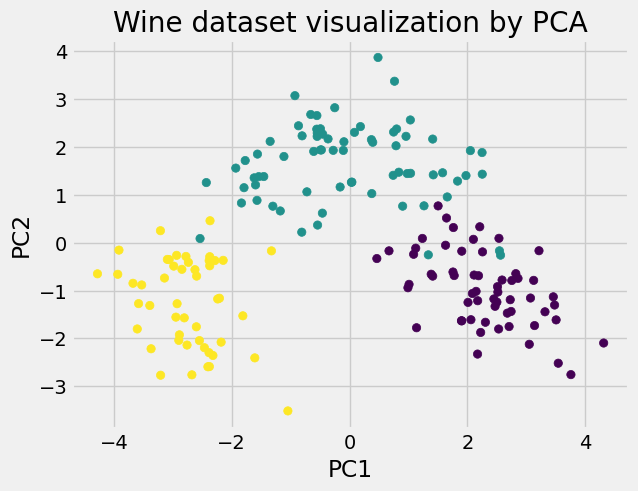

In [142]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 와인 데이터셋 불러오기
wine = load_wine()

# 데이터 정규화
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

# 결과 시각화
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wine dataset visualization by PCA')
plt.show()

In [143]:
# PCA 분류

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(wine_pca, wine.target)

# 예측 및 정확도 평가
y_pred = knn.predict(wine_pca)
accuracy = accuracy_score(wine.target, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9719101123595506


##의사결정트리

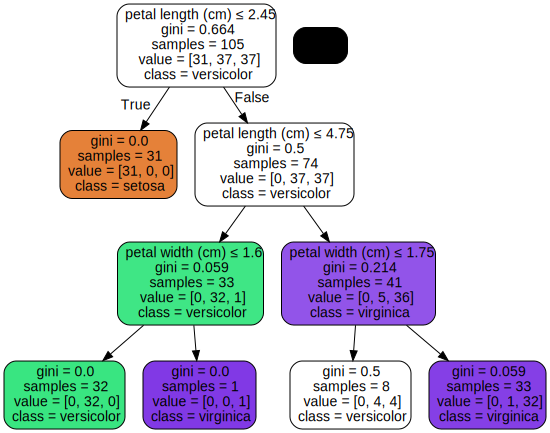

In [144]:
# 의사결정트리

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz
import pydotplus

# 붓꽃 데이터셋 불러오기
iris = load_iris()

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.3, random_state=42)

# 의사결정트리 모델 생성 및 학습
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# 의사결정트리 시각화
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=iris.feature_names, 
                           class_names=iris.target_names,
                           filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graphviz.Source(graph.to_string())

In [145]:
import numpy as np
new = np.array([[5.1,3.5,1.4,0.2]])
print(new)
y_pred = tree.predict(new)
y_pred

[[5.1 3.5 1.4 0.2]]


array([0])

## 서포트백터머신

In [146]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 붓꽃 데이터셋 불러오기
iris = load_iris()

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.3, random_state=42)

# 서포트 벡터 머신 모델 생성 및 학습
svm = SVC(kernel='linear', C=1.0)  
svm.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


## 랜덤 포레스트 모델

In [147]:
# 랜덤 포레스트

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 붓꽃 데이터셋 불러오기
iris = load_iris()

# 데이터와 레이블 분리
X = iris.data
y = iris.target

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# 테스트 데이터셋으로 예측 수행
y_pred = rfc.predict(X_test)

# 정확도 출력
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


##그리드 서치

In [148]:
## 그리드서치 

import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기
iris = load_iris()

# 모델 - DecisionTreeClassifier 
tree_model = DecisionTreeClassifier()
tree_model.fit(iris.data, iris.target)

# 파라미터
param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# 학습 - param_grid의 하이퍼파라미터들을 순차적으로 학습
grid_trees = GridSearchCV(tree_model, param_grid=param, cv=3)
# cv: 교차검증 fold 개수
grid_trees.fit(iris.data, iris.target)

# 학습 결과 - GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_trees.cv_results_)
scores_df.iloc[:, 6:]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.66,0.66,0.66,0.660000,0.000000,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.66,0.66,0.66,0.660000,0.000000,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.96,0.92,0.92,0.933333,0.018856,3
3,"{'max_depth': 2, 'min_samples_split': 3}",0.96,0.92,0.92,0.933333,0.018856,3
4,"{'max_depth': 3, 'min_samples_split': 2}",0.98,0.94,1.00,0.973333,0.024944,1
5,"{'max_depth': 3, 'min_samples_split': 3}",0.98,0.94,1.00,0.973333,0.024944,1


##손글씨 데이터

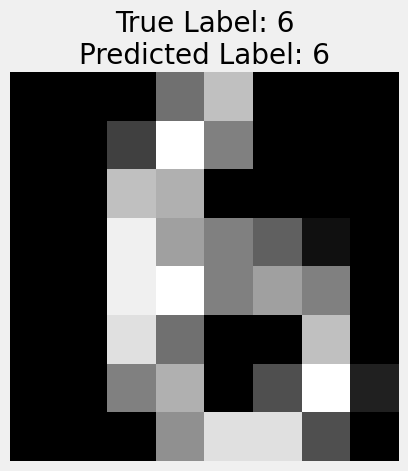

In [149]:
# 손글씨 데이터

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 손글씨 숫자 데이터셋 불러오기
digits = load_digits()

# 데이터와 레이블 분리
X = digits.data
y = digits.target

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

# KNN 분류 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 테스트 데이터셋으로 예측 수행
y_pred = knn.predict(X_test)

# 첫 번째 샘플 이미지와 예측 결과 시각화
plt.imshow(X_test[0].reshape(8, 8), cmap='gray')
plt.title('True Label: {}\nPredicted Label: {}'.format(y_test[0], y_pred[0]))
plt.axis('off')
plt.show()

In [151]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [155]:
len(X)

1797

In [156]:
# MNIST 손글씨

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784')

# 데이터와 레이블 분리
X = mnist['data']
y = mnist['target']

# 데이터 정규화
X = X / 255.

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 테스트 데이터셋으로 예측 수행
y_pred = rf.predict(X_test)

# 정확도 출력
print('Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9675


In [158]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [166]:
import numpy as np
import matplotlib.pyplot as plt

tmp = np.array(X.iloc[0]).reshape(-1,28)

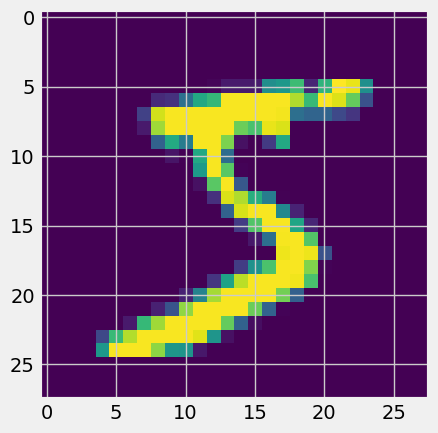

In [167]:
plt.imshow(tmp)

In [168]:
print(y[0])

5


In [169]:
# 데이터 정규화
X = X / 255.

# 훈련 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 생성 및 학습
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 테스트 데이터셋으로 예측 수행
y_pred = rf.predict(X_test)

# 정확도 출력
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9671428571428572


46730    8
48393    4
41416    8
34506    7
43725    7
11615    0
24656    6
22411    2
936      7
56364    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


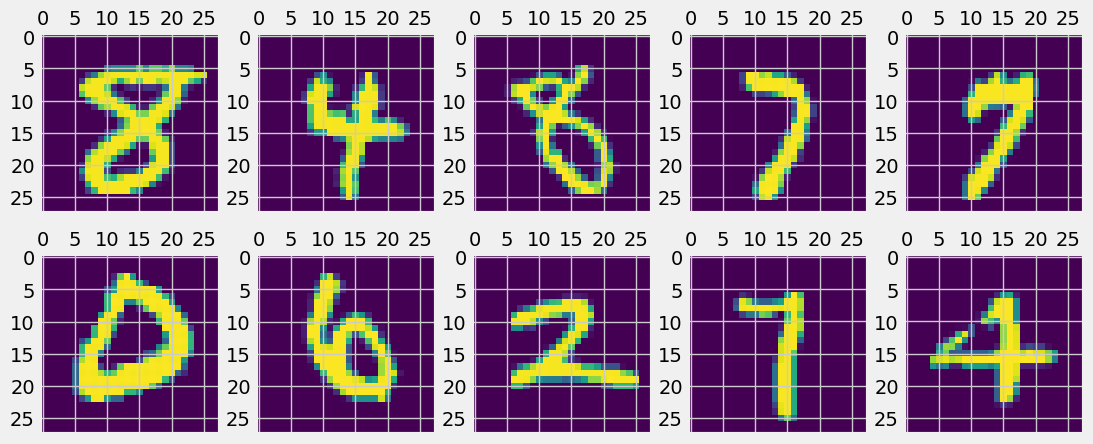

In [170]:
import matplotlib.pyplot as plt

figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = X_test[i:i+1]
    tmp = np.array(tmp)
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)
    
print(y_test[:10])

for i in range(10):
    axes[i].matshow(tmp_list[i])

In [171]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [172]:
from IPython.display import HTML

HTML(input_form + javascript)

In [173]:
test_data = np.array(image)   # 코랩에서는 안되고, 쥬피터 노트북에서는 가능
test_data = test_data.reshape(1,784)
yhat_test = rf.predict(test_data)
print(yhat_test)

NameError: ignored

In [ ]:
# 구글 데이터셋서치
https://datasetsearch.research.google.com/

In [ ]:
# ai hub
https://aihub.or.kr/ 

In [ ]:
# 캐글 데이터셋
https://www.kaggle.com/datasets

In [ ]:
# https://drive.google.com/file/d/1P5sB6_za4QduZ0ZjsifpXk0KBwXfYKEW/view?usp=sharing

In [174]:
import pandas as pd

df = pd.read_csv('한국환경공단_도로 재비산먼지 측정 정보_20230331_cng.csv',encoding='cp949')
df

,측정일자,측정시간,지역,지역명,도로명,시작점,종점,기온,습도,재비산먼지 평균농도,오염범례
0,2023-03-02,10:09,서울,영등포구,국회대로(동→서),서울특별시 마포구 당인동 313 천,서울특별시 영등포구 양평동3가 57-5도,2,29,227,매우나쁨
1,2023-03-02,10:29,서울,영등포구,영등포로(서→동),서울특별시 영등포구 양평동2가 42-1도,서울특별시 영등포구 신길동 산168도,3,27,76,좋음
2,2023-03-02,11:02,서울,동작구,흑석한강로(남→북),서울특별시 동작구 흑석동 336-7 도,서울특별시 동작구 흑석동 25-2도,2,27,183,나쁨
3,2023-03-02,11:08,서울,동작구,노량진로(동→서),서울특별시 동작구 본동 475-1도,서울특별시 동작구 대방동 117-7도,3,26,83,좋음
4,2023-03-02,11:30,서울,관악구,남부순환로(서→동),서울특별시 관악구 신림동 1674-6도,서울특별시 동작구 사당동 1112도,4,25,63,좋음
...,...,...,...,...,...,...,...,...,...,...,...
111,2023-03-30,14:18,서울,중랑구,숙선옹주로(서→동),서울특별시 중랑구 묵동 198-7구,서울특별시 중랑구 묵동 30 도,21,21,43,매우좋음
112,2023-03-30,14:21,서울,중랑구,신내로(북→남),서울특별시 중랑구 묵동 26-1 천,서울특별시 중랑구 망우동 534-6도,21,21,28,매우좋음
113,2023-03-30,14:31,서울,중랑구,상봉로(북→남),서울특별시 중랑구 상봉동 160-2도,서울특별시 중랑구 면목동 49-5도,22,21,39,매우좋음
114,2023-03-30,14:38,서울,중랑구,사가정로(동→서),서울특별시 중랑구 면목동 1326-107도,서울특별시 중랑구 면목동 727-24천,22,20,13,매우좋음


In [175]:
df['기온']

0       2
1       3
2       2
3       3
4       4
       ..
111    21
112    21
113    22
114    22
115    22
Name: 기온, Length: 116, dtype: int64

In [177]:
X = df[['기온','습도','재비산먼지 평균농도']]
y=df['오염범례']

In [178]:
X

,기온,습도,재비산먼지 평균농도
0,2,29,227
1,3,27,76
2,2,27,183
3,3,26,83
4,4,25,63
...,...,...,...
111,21,21,43
112,21,21,28
113,22,21,39
114,22,20,13


In [179]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [180]:
newdata = [[10,20,10]]
y_pred = knn.predict(newdata)
print('데이터', newdata[0], ' 판정 결과 --->', y_pred[0])

데이터 [10, 20, 10]  판정 결과 ---> 매우좋음


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwar

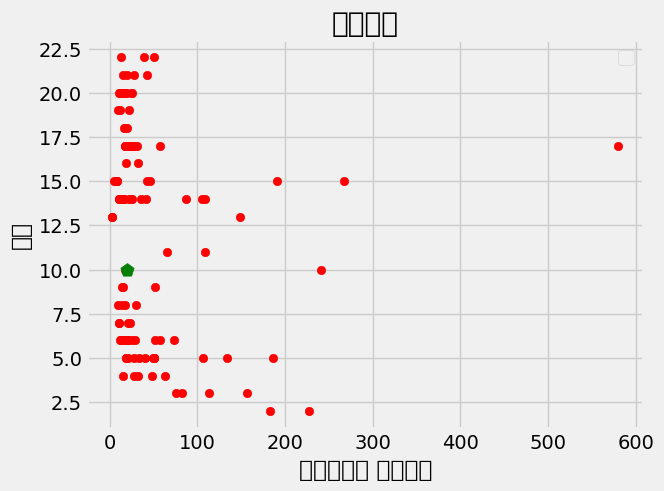

In [181]:
import matplotlib.pyplot as plt

plt.scatter(X['재비산먼지 평균농도'], X['기온'], c='r')

plt.xlabel('재비산먼지 평균농도')             
plt.ylabel('기온')             
plt.title("미세먼지")
plt.legend(loc='upper right')


plt.scatter(20, 10, s=100, marker='p', c='green', label='new Data')

In [183]:
!pip install wandb

import wandb
wandb.init(project="프로젝트 이름")

wandb.log('기록할 값')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/wandb_init.py", line 1141, in init
    wi.setup(kwargs)
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/wandb_init.py", line 289, in setup
    wandb_login._login(
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/wandb_login.py", line 298, in _login
    wlogin.prompt_api_key()
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/wandb_login.py", line 221, in prompt_api_key
    key, status = self._prompt_api_key()
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/wandb_login.py", line 201, in _prompt_api_key
    key = apikey.prompt_api_key(
  File "/usr/local/lib/python3.9/dist-packages/wandb/sdk/lib/apikey

Error: ignored

## 실제 주식 데이터 분석

In [184]:
from pandas_datareader import data as pdr
# 종목번호, 어디서 제공받을지, 시작날짜, 종료날짜
samsung = pdr.DataReader('005930', 'naver', '2010-01-01', '2022-12-31')


print(samsung.tail())

             Open   High    Low  Close    Volume
Date                                            
2022-12-23  58200  58400  57700  58100   9829407
2022-12-26  58000  58100  57700  57900   6756411
2022-12-27  58000  58400  57900  58100  10667027
2022-12-28  57600  57600  56400  56600  14665410
2022-12-29  56000  56200  55300  55300  11295935


In [185]:
print(samsung.dtypes)

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object


In [186]:
print(type(samsung['High'][0]))
print(samsung['High'][0])

<class 'str'>
16180


In [205]:
samsung = samsung.astype('float') # str 형식을 숫자 형식으로 변경
print(samsung.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


In [206]:
print(samsung['High'].max())
print(samsung['High'].idxmax())

96800.0
2021-01-11 00:00:00


In [191]:
samsung.describe()

,Open,High,Low,Close,Volume
count,3208.000000,3208.000000,3208.000000,3208.00000,3.208000e+03
mean,39036.569514,39407.403055,38653.312968,39073.53803,5.871273e+06
std,19027.196233,19185.749077,18863.733161,18974.79503,8.994484e+06
min,0.000000,0.000000,0.000000,13600.00000,0.000000e+00
25%,25090.000000,25340.000000,24855.000000,25095.00000,2.275375e+05
50%,30530.000000,30779.500000,30229.500000,30550.00000,3.571665e+05
75%,51120.000000,51705.000000,50605.000000,51230.00000,1.129689e+07
max,90300.000000,96800.000000,89500.000000,91000.00000,9.030618e+07


In [192]:
samsung_close = samsung['Close']
print(samsung_close)

Date
2010-01-04    16180.0
2010-01-05    16440.0
2010-01-06    16820.0
2010-01-07    16260.0
2010-01-08    16420.0
               ...   
2022-12-23    58100.0
2022-12-26    57900.0
2022-12-27    58100.0
2022-12-28    56600.0
2022-12-29    55300.0
Name: Close, Length: 3208, dtype: float64


<Axes: xlabel='Date'>

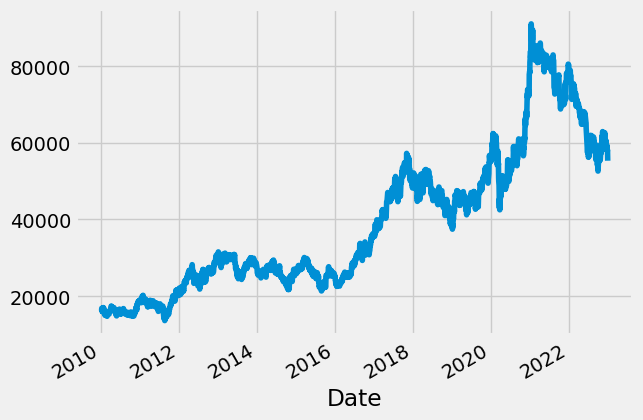

In [193]:
samsung_close.plot()

<Axes: xlabel='Date'>

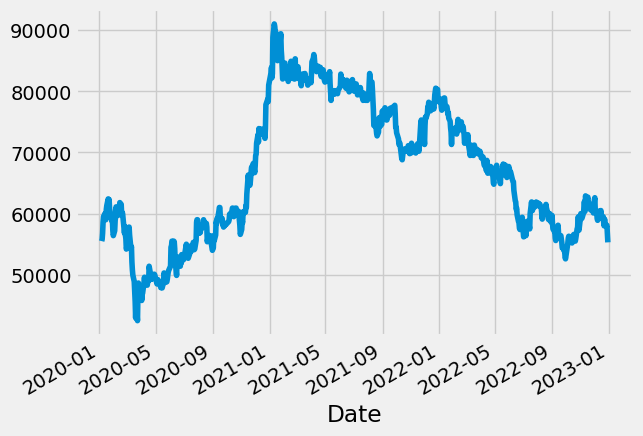

In [194]:
samsung['Close'].loc['2020-01-04':'2022-12-31'].plot()

<Axes: xlabel='Date'>

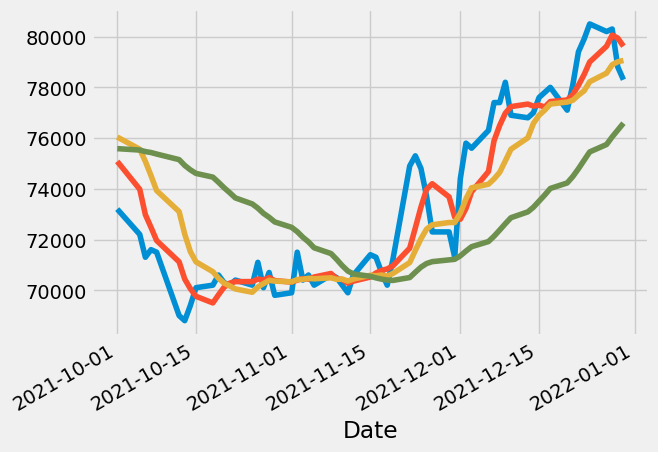

In [195]:
moving_average_5 = samsung['Close'].rolling(5, min_periods=1).mean()  #이동평균
samsung.insert(len(samsung.columns),"MA5",moving_average_5)

moving_average_10 = samsung['Close'].rolling(10, min_periods=1).mean()
samsung.insert(len(samsung.columns),"MA10",moving_average_10)

moving_average_30 = samsung['Close'].rolling(30, min_periods=1).mean()
samsung.insert(len(samsung.columns),"MA30",moving_average_30)

samsung['Close'].loc['2021-10-01':'2022-01-01'].plot()
samsung['MA5'].loc['2021-10-01':'2022-01-01'].plot()
samsung['MA10'].loc['2021-10-01':'2022-01-01'].plot()
samsung['MA30'].loc['2021-10-01':'2022-01-01'].plot()

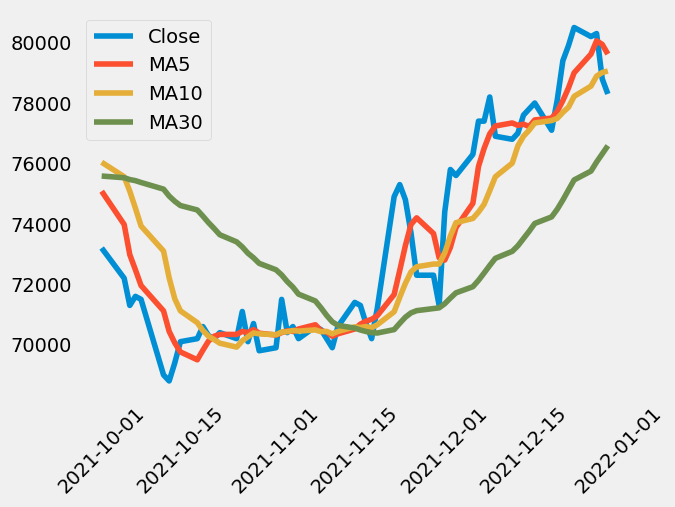

In [196]:
import matplotlib.pyplot as plt

plt.plot(samsung['Close'].loc['2021-10-01':'2022-01-01'],label='Close')
plt.plot(samsung['MA5'].loc['2021-10-01':'2022-01-01'],label='MA5')
plt.plot(samsung['MA10'].loc['2021-10-01':'2022-01-01'],label='MA10')
plt.plot(samsung['MA30'].loc['2021-10-01':'2022-01-01'],label='MA30')

plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [197]:
from pandas_datareader import data as pdr 
import pandas as pd
samsung = pdr.DataReader('005930', 'naver', '2010-01-01', '2022-12-31')
lg = pdr.DataReader('066570', 'naver', '2010-01-01', '2022-12-31')
kospi = pdr.DataReader('KOSPI', 'naver', '2010-01-01', '2022-12-31')
hyundai = pdr.DataReader('005380', 'naver', '2010-01-01', '2022-12-31')
samsung = samsung.astype('float')
lg = lg.astype('float')
kospi = kospi.astype('float')
hyundai = hyundai.astype('float')

In [198]:
samsung_close = samsung['Close']
lg_close = lg['Close']
kospi_close = kospi['Close']
hyundai_close = hyundai['Close']

In [199]:
result = pd.concat([samsung_close,lg_close,kospi_close,hyundai_close],
                   axis=1,keys=['samsung','lg','kospi','hyundai'])

In [200]:
result.corr(method='pearson') #코릴레이스 (상관계수 구하기)

,samsung,lg,kospi,hyundai
samsung,1.000000,0.567350,0.896565,-0.029544
lg,0.567350,1.000000,0.722494,0.307326
kospi,0.896565,0.722494,1.000000,0.211064
hyundai,-0.029544,0.307326,0.211064,1.000000


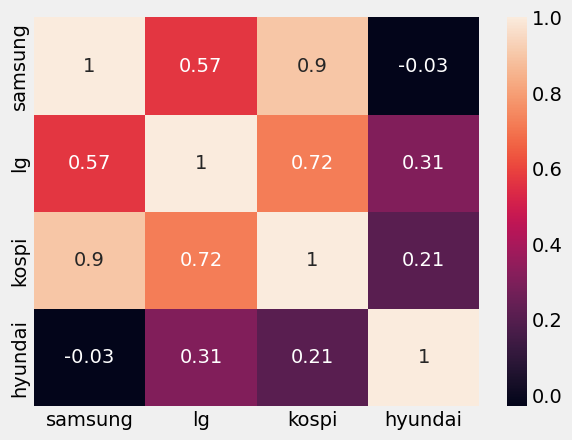

In [201]:
import seaborn as sns
sns.heatmap(result.corr(method='pearson'), annot=True)
plt.show()

In [202]:
from pandas_datareader import data as pdr 
samsung = pdr.DataReader('005930', 'naver', '2010-01-01', '2022-12-31')
samsung = samsung.astype('float')
print(samsung.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


<Axes: xlabel='Date'>

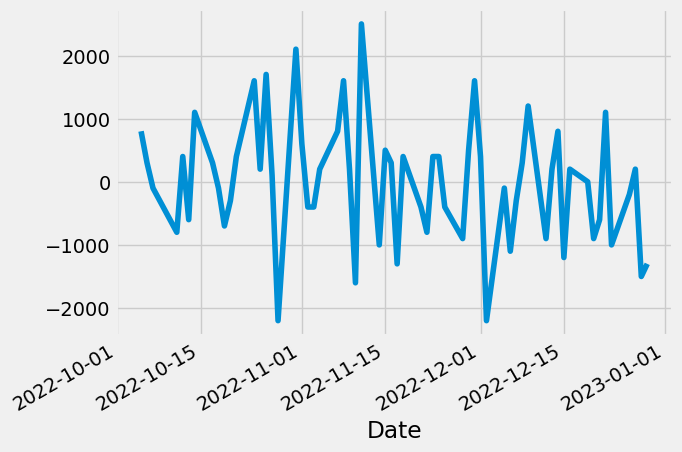

In [203]:
(samsung['Close'].loc['2022-10-01':'2022-12-31'] - samsung['Close'].loc['2022-10-01':'2022-12-31'].shift(1)).plot()

In [207]:
import requests
import pandas as pd

# API 엔드포인트 설정
url = 'https://api.upbit.com/v1/candles/minutes/1'

# 요청할 코인의 종류와 개수 설정
markets = ['KRW-BTC', 'KRW-ETH']   # 비트코인과 이더리움 가격 정보를 가져옴
count = 10   # 최근 10개의 캔들 정보를 가져옴

# API 요청 보내기
data = []
for market in markets:
    params = {'market': market, 'count': count}
    response = requests.get(url, params=params)
    data += response.json()

# JSON 데이터를 판다스 데이터프레임으로 변환
df = pd.DataFrame(data)
df = df[['market', 'candle_date_time_utc', 'opening_price', 'high_price', 'low_price', 'trade_price']]
df.columns = ['market', 'date', 'open', 'high', 'low', 'close']

# 결과 출력
df

,market,date,open,high,low,close
0,KRW-BTC,2023-04-23T05:27:00,36892000.0,36901000.0,36891000.0,36901000.0
1,KRW-BTC,2023-04-23T05:26:00,36891000.0,36892000.0,36891000.0,36892000.0
2,KRW-BTC,2023-04-23T05:25:00,36895000.0,36897000.0,36888000.0,36890000.0
3,KRW-BTC,2023-04-23T05:24:00,36899000.0,36900000.0,36891000.0,36897000.0
4,KRW-BTC,2023-04-23T05:23:00,36900000.0,36900000.0,36898000.0,36899000.0
5,KRW-BTC,2023-04-23T05:22:00,36914000.0,36916000.0,36899000.0,36899000.0
6,KRW-BTC,2023-04-23T05:21:00,36899000.0,36914000.0,36899000.0,36914000.0
7,KRW-BTC,2023-04-23T05:20:00,36897000.0,36915000.0,36892000.0,36898000.0
8,KRW-BTC,2023-04-23T05:19:00,36896000.0,36897000.0,36891000.0,36897000.0
9,KRW-BTC,2023-04-23T05:18:00,36903000.0,36917000.0,36897000.0,36897000.0


##aws rekognition

https://aws.amazon.com/ko/rekognition/

In [ ]:
import boto3

# AWS credentials 설정
access_key = 'ACCESS_KEY'
secret_key = 'SECRET_KEY'
region_name = 'REGION_NAME'
session = boto3.Session(aws_access_key_id=access_key,
                        aws_secret_access_key=secret_key,
                        region_name=region_name)

# S3 버킷에서 이미지 파일 객체 생성
s3 = session.client('s3')
bucket_name = 'BUCKET_NAME'
object_key = 'OBJECT_KEY'
response = s3.get_object(Bucket=bucket_name, Key=object_key)
image = response['Body'].read()

# Rekognition 서비스 호출하여 라벨 분류
rekognition = session.client('rekognition')
response = rekognition.detect_labels(
    Image={
        'Bytes': image
    },
    MaxLabels=10
)

# 분류 결과 출력
labels = response['Labels']
for label in labels:
    print(label['Name'], label['Confidence'])


##  네이버 클라우드 서비스
- 쳇봇
- 텍스트를 읽어주는 서비스 등등

## Azure - 애저,  kt  등등 클라우드 서비스

아마존 라이트셀, 에저 빌드, 

구름 플랫폼

## AWS Elastic Beanstalk    관리형 플랫폼  
- 자바 톰켓 바로 업로드 가능.  
https://docs.aws.amazon.com/ko_kr/elasticbeanstalk/latest/dg/Welcome.html